# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

C:\Users\dwang\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
from datetime import datetime
df['Data_Value']=df['Data_Value']*0.1
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [4]:
temp=df.copy()
temp['month-day']=temp['Date'].apply(lambda x: x[5:])
temp['year']=temp['Date'].apply(lambda x: x[:4])
#temp.astype({'year':'int32'},copy=False)
temp['year']=pd.to_numeric(temp['year'])
#Remove 2-29
temp = temp[temp['month-day'] != '02-29']
temp.head()

,ID,Date,Element,Data_Value,month-day,year
0,USW00094889,2014-11-12,TMAX,2.2,11-12,2014
1,USC00208972,2009-04-29,TMIN,5.6,04-29,2009
2,USC00200032,2008-05-26,TMAX,27.8,05-26,2008
3,USC00205563,2005-11-11,TMAX,13.9,11-11,2005
4,USC00200230,2014-02-27,TMAX,-10.6,02-27,2014


In [6]:
temp=temp.sort_values(['ID','Date'])

temp.head()

,ID,Date,Element,Data_Value,month-day,year
55067,USC00200032,2005-01-01,TMIN,-2.8,01-01,2005
55102,USC00200032,2005-01-01,TMAX,6.7,01-01,2005
112671,USC00200032,2005-01-02,TMAX,12.2,01-02,2005
112708,USC00200032,2005-01-02,TMIN,-0.6,01-02,2005
104159,USC00200032,2005-01-03,TMIN,1.1,01-03,2005


In [7]:
t_min  = temp[(temp['Element'] == 'TMIN') & (temp['year'] != 2015)].groupby('month-day').agg({'Data_Value':'min'})
t_max  = temp[(temp['Element'] == 'TMAX') & (temp['year'] != 2015)].groupby('month-day').agg({'Data_Value':'max'})
t_min.reset_index(inplace=True)   
t_max.reset_index(inplace=True) 
t_min.columns=['month-day','t_min']
t_max.columns=['month-day','t_max']
print(t_min.head())
print(t_max.head())

  month-day  t_min
0     01-01  -16.0
1     01-02  -26.7
2     01-03  -26.7
3     01-04  -26.1
4     01-05  -15.0
  month-day  t_max
0     01-01   15.6
1     01-02   13.9
2     01-03   13.3
3     01-04   10.6
4     01-05   12.8


In [9]:
min2015 = temp[(temp['Element'] == 'TMIN') & (temp['year'] == 2015)].groupby('month-day').agg({'Data_Value':'min'})
max2015 = temp[(temp['Element'] == 'TMAX') & (temp['year'] == 2015)].groupby('month-day').agg({'Data_Value':'max'})
min2015.reset_index(inplace=True)
max2015.reset_index(inplace=True)
min2015.columns=['month-day','min2015']
max2015.columns=['month-day','max2015']
print(min2015.head())
print(max2015.head())

  month-day  min2015
0     01-01    -13.3
1     01-02    -12.2
2     01-03     -6.7
3     01-04     -8.8
4     01-05    -15.5
  month-day  max2015
0     01-01      1.1
1     01-02      3.9
2     01-03      3.9
3     01-04      4.4
4     01-05      2.8


In [10]:
import numpy as np
final=pd.merge(t_min,t_max,on='month-day', left_index=True)
final=pd.merge(final,min2015,on='month-day')
final=pd.merge(final,max2015,on='month-day')
print(final.shape)
final.head(10)


(365, 5)


,month-day,t_min,t_max,min2015,max2015
0,01-01,-16.0,15.6,-13.3,1.1
1,01-02,-26.7,13.9,-12.2,3.9
2,01-03,-26.7,13.3,-6.7,3.9
3,01-04,-26.1,10.6,-8.8,4.4
4,01-05,-15.0,12.8,-15.5,2.8
5,01-06,-26.6,18.9,-18.2,3.3
6,01-07,-30.6,21.7,-18.2,-6.7
7,01-08,-29.4,19.4,-21.1,-8.2
8,01-09,-27.8,17.8,-20.6,-6.6
9,01-10,-25.6,10.0,-20.6,-7.1


In [11]:
brkhigh_index=final[final['max2015']>final['t_max']].index
brklow_index=final[final['min2015']<final['t_min']].index
brkhigh_index
brklow_index

Int64Index([  4,  10,  33,  44,  45,  46,  47,  49,  50,  51,  53,  54,  55,
             56,  57,  58,  63,  64,  65,  86,  87,  88, 113, 114, 139, 183,
            239, 289, 290, 291, 292, 313],
           dtype='int64')

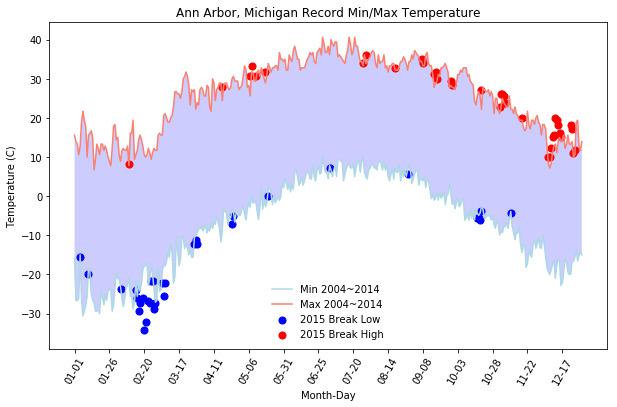

In [16]:
plt.figure(figsize=(10,6))
#plot min and max line
plt.plot(final['t_min'], 'lightblue', label='Min 2004~2014')
plt.plot(final['t_max'], 'salmon', label='Max 2004~2014')

plt.gca().fill_between(range(len(final)),final['t_min'],final['t_max'],facecolor = "blue",alpha = 0.2)
tick=range(0, len(final), 25)
plt.xticks(tick, final['month-day'][list(tick)], rotation = '60')

#plot 2015 record breaking point
plt.scatter(brklow_index, final.loc[brklow_index,'min2015'], s = 50,c = 'blue', label = '2015 Break Low')
plt.scatter(brkhigh_index, final.loc[brkhigh_index,'max2015'], s = 50, c = 'red', label = '2015 Break High')

plt.xlabel('Month-Day')
plt.ylabel('Temperature (C)')
plt.title("Ann Arbor, Michigan Record Min/Max Temperature")
plt.legend(frameon = False, loc = "lower center")
plt.savefig('C2A2.png')
plt.show()

<Figure size 432x288 with 0 Axes>